**IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**LOAD DATASET**

In [2]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.shape

(1067, 13)

In [7]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

**Simple linear regression**

In [9]:
Y = df['CO2EMISSIONS']
Y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [10]:
df.select_dtypes(include=['number'])

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


In [11]:
df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS', ]]

In [12]:
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [13]:
df.sample(frac = 1, random_state=42).reset_index(drop=True)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4.7,8,13.2,304
1,3.5,6,9.6,221
2,3.6,6,12.8,294
3,3.0,6,9.6,221
4,2.0,4,9.0,207
...,...,...,...,...
1062,3.6,6,12.0,276
1063,2.4,4,10.0,230
1064,4.4,8,13.8,317
1065,1.8,4,8.6,198


In [14]:
df.corrwith(df['CO2EMISSIONS'])

ENGINESIZE              0.874154
CYLINDERS               0.849685
FUELCONSUMPTION_COMB    0.892129
CO2EMISSIONS            1.000000
dtype: float64

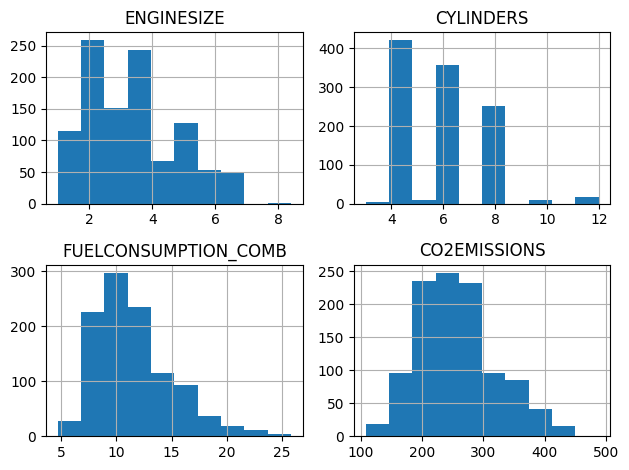

In [15]:
df.hist()
plt.tight_layout()

Text(0, 0.5, 'FUELCONSUMPTION_COMB')

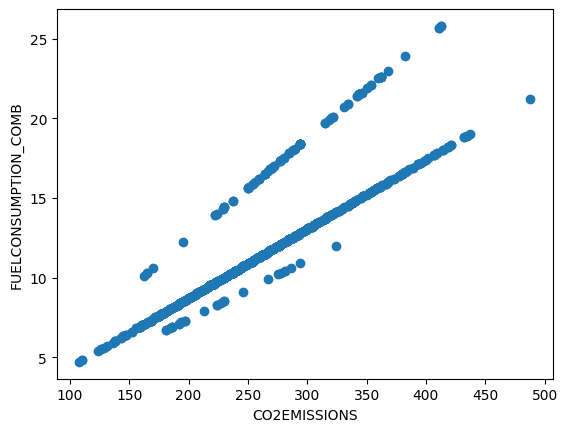

In [16]:
plt.scatter(df['CO2EMISSIONS'],df['FUELCONSUMPTION_COMB'])
plt.xlabel('CO2EMISSIONS')
plt.ylabel('FUELCONSUMPTION_COMB')

(100.0, 4000.0)

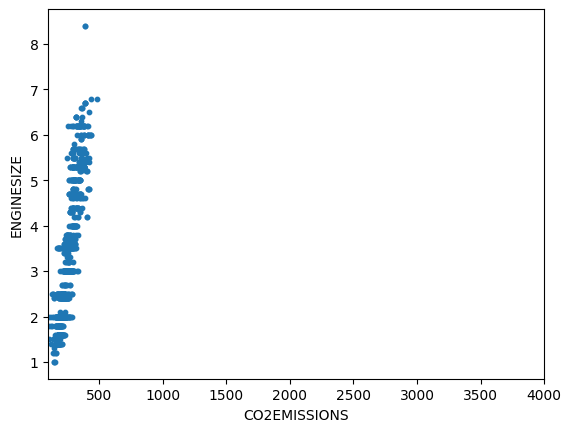

In [17]:
# plt.figure(figsize=(8,5))
plt.scatter(df['CO2EMISSIONS'],df['ENGINESIZE'], s =10)
plt.xlabel('CO2EMISSIONS')
plt.ylabel('ENGINESIZE')
plt.xlim(100,4000)

No linear pattern obviosly <br>
even after xlim the range grows enormoursly hence of no use

In [18]:
X = df['FUELCONSUMPTION_COMB'].to_numpy()
X

array([ 8.5,  9.6,  5.9, ..., 11.8, 11.3, 12.8])

In [19]:
Y = df['CO2EMISSIONS'].to_numpy()
Y

array([196, 221, 136, ..., 271, 260, 294])

Seperating the test and train dataset

In [20]:
X_train = X[ : int(len(X)*0.8)]
X_test = X[int(len(X)*0.8): ]

Y_train = Y[ : int(len(X)*0.8)]
Y_test = Y[int(len(X)*0.8): ]

Normalize data

In [21]:
X_train = (X_train - np.mean(X_train)) / np.std(X_train)
Y_train = (Y_train - np.mean(Y_train)) / np.std(Y_train)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)
Y_test = (Y_test - np.mean(Y_test)) / np.std(Y_test)

Get batch out of array

In [22]:
import random

def batch_loader(arr, batch_size = 2):
    index = 0
    total = len(arr)
    def get_next_batch():
        nonlocal index
        if index >= total:
            return None
        end = min(index + batch_size , total)
        batch = arr[index : end]
        index = end
        return batch
    return get_next_batch


# def not_too_far(a , b, min = 0.1 , max = 1 ):
#     return min <= abs(a - b) <= max


# Y = w*X + b
def find_wb(w=0.0, b=0.0, lr=0.1, epochs=1000):
    for epoch in range(epochs):
        # batch_X = batch_loader(X_train, batch_size=64)
        # batch_Y = batch_loader(Y_train, batch_size=64)
        batch_X = batch_loader(X_train, batch_size=len(X_train))
        batch_Y = batch_loader(Y_train, batch_size=len(Y_train))

        while True:
            X_batch = batch_X()
            Y_batch = batch_Y()
            if X_batch is None or Y_batch is None:
                break

            Y_pred = X_batch * w + b
            error = Y_batch - Y_pred

            dw = -2 * np.mean(X_batch * error)
            db = -2 * np.mean(error)

            w -=  lr * dw
            b -=  lr * db

        # Use MSE for better gradient tracking
        Y_pred_total = w * X_train + b
        total_loss = np.mean((Y_train - Y_pred_total) ** 2)
        print(f"Epoch {epoch+1}: w={w:.4f}, b={b:.4f}, loss={total_loss:.4f}")
        

        if total_loss < 0.001:
            break
    return w, b


    
W, B = find_wb()
print("\nFinal w:", W)
print("Final b:", B)

Epoch 1: w=0.1763, b=0.0000, loss=0.7204
Epoch 2: w=0.3173, b=0.0000, loss=0.5414
Epoch 3: w=0.4301, b=0.0000, loss=0.4269
Epoch 4: w=0.5203, b=0.0000, loss=0.3536
Epoch 5: w=0.5925, b=0.0000, loss=0.3067
Epoch 6: w=0.6503, b=0.0000, loss=0.2766
Epoch 7: w=0.6965, b=0.0000, loss=0.2574
Epoch 8: w=0.7335, b=0.0000, loss=0.2451
Epoch 9: w=0.7630, b=0.0000, loss=0.2373
Epoch 10: w=0.7867, b=0.0000, loss=0.2322
Epoch 11: w=0.8056, b=0.0000, loss=0.2290
Epoch 12: w=0.8208, b=0.0000, loss=0.2269
Epoch 13: w=0.8329, b=0.0000, loss=0.2256
Epoch 14: w=0.8426, b=0.0000, loss=0.2248
Epoch 15: w=0.8503, b=0.0000, loss=0.2242
Epoch 16: w=0.8565, b=0.0000, loss=0.2239
Epoch 17: w=0.8615, b=0.0000, loss=0.2237
Epoch 18: w=0.8654, b=0.0000, loss=0.2235
Epoch 19: w=0.8686, b=0.0000, loss=0.2234
Epoch 20: w=0.8712, b=0.0000, loss=0.2234
Epoch 21: w=0.8732, b=0.0000, loss=0.2233
Epoch 22: w=0.8748, b=0.0000, loss=0.2233
Epoch 23: w=0.8761, b=0.0000, loss=0.2233
Epoch 24: w=0.8772, b=0.0000, loss=0.2233
E

Gradient Explanation for:
dw = -2 * np.mean(X_batch * error)
db = -2 * np.mean(error)

The model is: Y_pred = w * X + b

The loss function is Mean Squared Error (MSE):
    Loss = (1/n) * Σ (Y - Y_pred)^2
         = (1/n) * Σ (Y - (w * X + b))^2

To minimize this loss, we use gradient descent.
That requires the partial derivatives of the loss
with respect to w and b:

Gradient w.r.t weight (w):
    dL/dw = -2 * mean(X * (Y - Y_pred))

Gradient w.r.t bias (b):
    dL/db = -2 * mean(Y - Y_pred)

In code:
    error = Y_batch - Y_pred
    dw = -2 * np.mean(X_batch * error)
    db = -2 * np.mean(error)

These gradients point in the direction of increasing loss,
so we subtract them during the update:
    w = w - lr * dw
    b = b - lr * db


In [23]:
Yt_pred = W * X_test + B

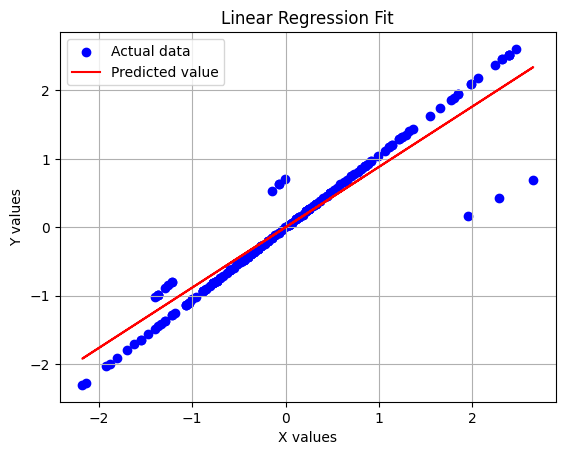

In [24]:
plt.scatter(X_test, Y_test, color = 'blue', label = 'Actual data')

plt.plot(X_test, Yt_pred, color = 'red', label = 'Predicted value')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
